In [ ]:
#Libraries to load dataset
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import random
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load the data from Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1TFf35hzj6MZnRyx_Tfi4WlazoktewmaG"})
downloaded.GetContentFile('train.txt')

downloaded = drive.CreateFile({'id':"1AMFyfpWfkLCQxKAYHIgj_be29NkOGVQe"})
downloaded.GetContentFile('model_1_cluster_0.keras')
downloaded = drive.CreateFile({'id':"1fUhWdAOZMx93El4TxlN3ybaEVDkDMgKb"})
downloaded.GetContentFile('model_2_cluster_0.keras')
downloaded = drive.CreateFile({'id':"1uuKu5Yx6S98m89M01f1xhxjTOUEwARaJ"})
downloaded.GetContentFile('model_3_cluster_0.keras')

downloaded = drive.CreateFile({'id':"1_922Z97377E8RoLWVMFCYYJJXWQfroT1"})
downloaded.GetContentFile('model_1_cluster_1.keras')
downloaded = drive.CreateFile({'id':"1qaiGgyOySqMMcFU50HMV4pESIP4wiCOu"})
downloaded.GetContentFile('model_2_cluster_1.keras')
downloaded = drive.CreateFile({'id':"1ySVgg-RTJ-qVbsFccj9MSnS3-XKN2m_d"})
downloaded.GetContentFile('model_3_cluster_1.keras')

downloaded = drive.CreateFile({'id':"1l2cjS4bclAlNxnJ8EnMqNnNzdLnugAq-"})
downloaded.GetContentFile('model_1_cluster_2.keras')
downloaded = drive.CreateFile({'id':"1PGoLrm5bwKAyRYkAWrIvly7zuLvvHyJR"})
downloaded.GetContentFile('model_2_cluster_2.keras')
downloaded = drive.CreateFile({'id':"1wiHb9Lvh-OflnkOhSUV0NqysbY03mn_U"})
downloaded.GetContentFile('model_3_cluster_2.keras')

downloaded = drive.CreateFile({'id':"1-8V22qlQADqPt5wuRHlasGa173pcY92u"})
downloaded.GetContentFile('model_1_cluster_3.keras')
downloaded = drive.CreateFile({'id':"1fO-A-HMHd6WgrH_oXmas0HI8uJzfkk4t"})
downloaded.GetContentFile('model_2_cluster_3.keras')
downloaded = drive.CreateFile({'id':"1BYnw4QvbU9ibyCXmyZ5H51coJ2PK5mC2"})
downloaded.GetContentFile('model_3_cluster_3.keras')

downloaded = drive.CreateFile({'id':"1u9_VIo2GL1QoVgBpF91Yh8nNS6NPycvS"})
downloaded.GetContentFile('model_1_cluster_4.keras')
downloaded = drive.CreateFile({'id':"1ClOFLxaL61_mY9q_n68A1mCj1X2u8bPV"})
downloaded.GetContentFile('model_2_cluster_4.keras')
downloaded = drive.CreateFile({'id':"1HC0Rr6gKNXQBuQpoBQHquY3LogK7oc_F"})
downloaded.GetContentFile('model_3_cluster_4.keras')

downloaded = drive.CreateFile({'id':"1RZrgXfaLQpW5l86KiKJoP__IqIulM9p6"})
downloaded.GetContentFile('model_1_cluster_5.keras')
downloaded = drive.CreateFile({'id':"1fSrCbweHNl_j3bUu6ISa1XtnXMt9IPDA"})
downloaded.GetContentFile('model_2_cluster_5.keras')
downloaded = drive.CreateFile({'id':"1xYZbUfF8MsIwPkgaXijkoQ5KOankZcpw"})
downloaded.GetContentFile('model_3_cluster_5.keras')

downloaded = drive.CreateFile({'id':"1ZSorMrWAlMxX1C3rVNqP6leU9dDyKTGM"})
downloaded.GetContentFile('kmeans_model.pkl')

file = '/content/train.txt'

In [ ]:
# Definir las columnas del dataset
columns = ['motor_id', 'cycle'] + [f'setting_{i}' for i in range(1, 4)] + [f'sensor_measurement_{i}' for i in range(1, 21)]

# Cargar el archivo 'train.txt' en un DataFrame de pandasss
df = pd.read_csv('train.txt', sep='\s+', header=None, names=columns, engine='python', index_col=False)

# Eliminar cualquier columna extra que pueda haber sido creada debido a espacios en blanco adicionales
df = df.dropna(axis=1, how='all')

# Eliminar columnas que no son características (motor_id, n_ciclo)
X = df.drop(['motor_id', 'cycle'], axis=1).values
# Mostrar las primeras filas del DataFrame para verificar la carga
# print(df.head())

<ipython-input-123-62609579fbd9>:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('train.txt', sep='\s+', header=None, names=columns, engine='python', index_col=False)


In [ ]:
# Tomar solo las columnas setting_1, setting_2 y setting_3 para el clustering
X = df[['setting_1', 'setting_2', 'setting_3']]

# Aplicar K-means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
# Guardar el modelo KMeans
joblib.dump(kmeans, "kmeans_model.pkl")
#print("Modelo KMeans guardado exitosamente.")

# Crear una columna para cada cluster, clasificando en 0 o 1
for i in range(6):
    df[f'cluster_{i}'] = (df['cluster'] == i).astype(int)

In [ ]:
# Primero, agrupamos por motor_id y obtenemos el valor máximo de 'cycle' para cada motor
max_cycle_per_motor = df.groupby('motor_id')['cycle'].transform('max')

In [ ]:
# Luego, creamos la columna 'RUL' como max_cycle - cycle - 1
df['RUL'] =df['cycle'] - max_cycle_per_motor  - 1

In [ ]:
# Crear los subsets basados en las columnas de clusters
subset_cluster_0 = df[df['cluster_0'] == 1]
subset_cluster_1 = df[df['cluster_1'] == 1]
subset_cluster_2 = df[df['cluster_2'] == 1]
subset_cluster_3 = df[df['cluster_3'] == 1]
subset_cluster_4 = df[df['cluster_4'] == 1]
subset_cluster_5 = df[df['cluster_5'] == 1]

columns_to_drop = [
    'setting_2', "cluster",
    'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5',
    'sensor_measurement_2', 'sensor_measurement_5', 'sensor_measurement_6',
    'sensor_measurement_7', 'sensor_measurement_19', 'sensor_measurement_20'
]

# Aplicar drop a cada subset
subset_cluster_0 = subset_cluster_0.drop(columns=columns_to_drop)
subset_cluster_1 = subset_cluster_1.drop(columns=columns_to_drop)
subset_cluster_2 = subset_cluster_2.drop(columns=columns_to_drop)
subset_cluster_3 = subset_cluster_3.drop(columns=columns_to_drop)
subset_cluster_4 = subset_cluster_4.drop(columns=columns_to_drop)
subset_cluster_5 = subset_cluster_5.drop(columns=columns_to_drop)

subsets = [subset_cluster_0, subset_cluster_1, subset_cluster_2, subset_cluster_3, subset_cluster_4, subset_cluster_5]

In [ ]:
# Crear diccionarios para almacenar los subsets de entrenamiento y validación
train_sets = {}
val_sets = {}
test_sets = {}

# Iterate over the subsets and split them into 70% train, 15% validation, and 15% test
for i, subset in enumerate(subsets):
  # First split: 85% train_val and 15% test
  train_val, test = train_test_split(subset, test_size=0.15, random_state=42)

  # Second split: 70/85 for train, 15/85 for validation (this results in 70% and 15% of the original subset)
  train, val = train_test_split(train_val, test_size=0.1765, random_state=42)  # 0.1765 ≈ 15/85

  # Save the results in dictionaries
  train_sets[f'train_cluster_{i}'] = train
  val_sets[f'val_cluster_{i}'] = val
  test_sets[f'test_cluster_{i}'] = test

In [ ]:
input_dim = len(subset_cluster_0.columns)-1

In [ ]:
# First ANN model
model_1 = Sequential()

# First hidden layer
model_1.add(Dense(800, activation='relu', input_shape=(input_dim,)))
model_1.add(Dropout(0.4))

# Second hidden layer
model_1.add(Dense(700, activation='relu'))
model_1.add(Dropout(0.3))

model_1.add(Dense(1, activation='linear'))  # Capa de salida con 1 neurona para regresión
model_1.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Second ANN model
model_2 = Sequential()

# First hidden layer
model_2.add(Dense(1000, activation='softsign', input_shape=(input_dim,)))
model_2.add(Dropout(0.5))

# Second hidden layer
model_2.add(Dense(600, activation='softsign'))
model_2.add(Dropout(0.4))

model_2.add(Dense(1, activation='linear'))  # Capa de salida con 1 neurona para regresión
model_2.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Third ANN model
model_3 = Sequential()

# First hidden layer
model_3.add(Dense(600, activation='softplus', input_shape=(input_dim,)))
model_3.add(Dropout(0.3))

# Second hidden layer
model_3.add(Dense(400, activation='softplus'))
model_3.add(Dropout(0.2))

model_3.add(Dense(1, activation='linear'))  # Capa de salida con 1 neurona para regresión
model_3.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Número de épocas de entrenamiento (según la tabla)
epochs = 100

"""
The number of training epochs for all ANN models
in the ensemble was set to 100. However, to reduce over
tting,
the training operation was compelled to stop before the
speci
ed number of epochs if no improvement was observed
for ten iterations, this regularization was performed was done
early stopping technique [56].
"""
scaler = MinMaxScaler()

######################### ACA SE DEBE METER ALGO ITERATIVO PARA QUE LO HAGA CON LOS 6 SUBSETS ##############################
# Entrenamiento para los 6 clusters (del 0 al 5)
for i in range(6):

    # Define early stopping
    early_stopping1 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    early_stopping2 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    early_stopping3 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    # Obtener los datos de entrenamiento
    X_train = train_sets[f'train_cluster_{i}'].drop(columns=['RUL'])
    y_train = train_sets[f'train_cluster_{i}']['RUL']

    # Escalar los datos de entrenamiento (da valores entre 0 y 1)
    # Normalizar las características
    scaled_features = scaler.fit_transform(X_train)
    # Crear un nuevo DataFrame con las características normalizadas
    X_train_scaled = pd.DataFrame(scaled_features, columns=X_train.columns)

    # Obtener los datos de validación
    X_test = val_sets[f'val_cluster_{i}'].drop(columns=['RUL'])
    y_test = val_sets[f'val_cluster_{i}']['RUL']

    # Escalar los datos de validación (da valores entre 0 y 1)
    # Normalizar las características
    scaled_test_features = scaler.fit_transform(X_test)
    # Crear un nuevo DataFrame con las características normalizadas
    X_test_scaled = pd.DataFrame(scaled_test_features, columns=X_test.columns)

    # Se entrenan los modelos
    print(f"Entrenando modelos para cluster {i}...")

    history_1 = model_1.fit(X_train_scaled, y_train, batch_size=8, epochs=epochs, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping1], verbose=0)
    print(f"model_1 for cluster_{i} is trained")
    history_2 = model_2.fit(X_train_scaled, y_train, batch_size=16, epochs=epochs, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping2], verbose=0)
    print(f"model_2 for cluster_{i} is trained")
    history_3 = model_3.fit(X_train_scaled, y_train, batch_size=32, epochs=epochs, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping3], verbose=0)
    print(f"model_3 for cluster_{i} is trained")

    # Se guardan los modelos entrenados para cada cluster
    model_1.save(f'model_1_cluster_{i}.keras')
    model_2.save(f'model_2_cluster_{i}.keras')
    model_3.save(f'model_3_cluster_{i}.keras')
    # Finaliza el entrenamiento y el guardado de los modelos para el cluster
    print(f"Modelos guardados para cluster {i}.")


Entrenando modelos para cluster 2...
model_1 for cluster_2 is trained
model_2 for cluster_2 is trained
model_3 for cluster_2 is trained
Modelos guardados para cluster 2.
Entrenando modelos para cluster 3...
model_1 for cluster_3 is trained
model_2 for cluster_3 is trained
model_3 for cluster_3 is trained
Modelos guardados para cluster 3.
Entrenando modelos para cluster 4...
model_1 for cluster_4 is trained
model_2 for cluster_4 is trained
model_3 for cluster_4 is trained
Modelos guardados para cluster 4.
Entrenando modelos para cluster 5...
model_1 for cluster_5 is trained
model_2 for cluster_5 is trained
model_3 for cluster_5 is trained
Modelos guardados para cluster 5.


In [ ]:
predictions = {}
for i in range(6):
  # Obtener los datos de entrenamiento
  X_test = test_sets[f'test_cluster_{i}'].drop(columns=['RUL'])
  y_test = test_sets[f'test_cluster_{i}']['RUL']

  # Escalar los datos de entrenamiento (da valores entre 0 y 1)
  # Normalizar las características
  scaled_features = scaler.fit_transform(X_test)
  # Crear un nuevo DataFrame con las características normalizadas
  X_test_scaled = pd.DataFrame(scaled_features, columns=X_test.columns)
  # Cargar el modelo KMeans guardado
  # kmeans = joblib.load("kmeans_model.pkl")
  models = {}
  models[f'cluster_{i}'] = {
      'model_1': load_model(f'model_1_cluster_{i}.keras'),
      'model_2': load_model(f'model_2_cluster_{i}.keras'),
      'model_3': load_model(f'model_3_cluster_{i}.keras')
  }
  # Realizar la predicción
  prediction1 = models[f'cluster_{i}']["model_1"].predict(X_test_scaled)
  prediction2 = models[f'cluster_{i}']["model_2"].predict(X_test_scaled)
  prediction3 = models[f'cluster_{i}']["model_3"].predict(X_test_scaled)

  # Calcular el promedio de las predicciones
  average_prediction = (prediction1 + prediction2 + prediction3) / 3
  predictions[f'cluster_{i}'] = average_prediction

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
y_predicted = np.array(predictions[f'cluster_{0}']).flatten()
y_test = np.array(test_sets[f'test_cluster_{0}']['RUL'])

Mean Absolute Error (MAE): 27.377888875797577
Mean Squared Error (MSE): 1287.8547999275384
Root Mean Squared Error (RMSE): 35.886693911915856
Coeficiente de Determinación (R^2): 0.7353867292404175
Mean Absolute Percentage Error (MAPE): 38.86%
Precisión del modelo: 61.14%


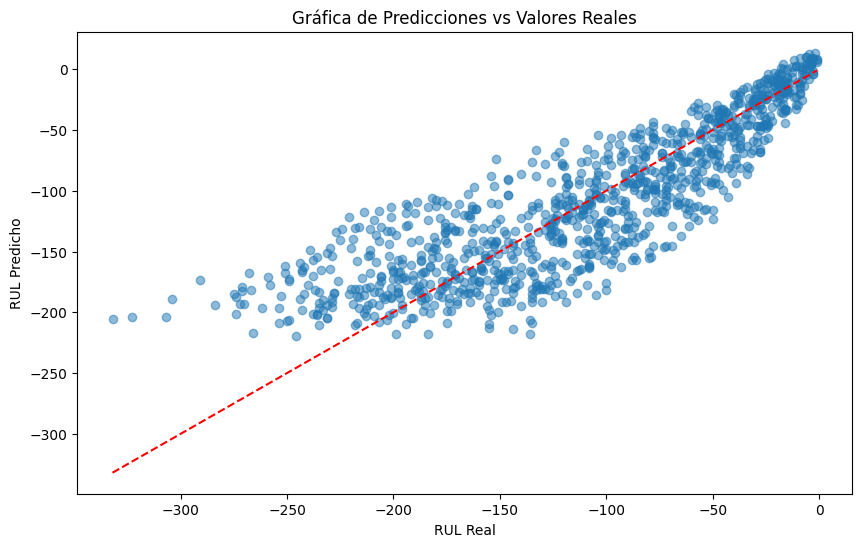

Mean Absolute Error (MAE): 26.987962378415236
Mean Squared Error (MSE): 1251.5836866832233
Root Mean Squared Error (RMSE): 35.37772868180239
Coeficiente de Determinación (R^2): 0.7294723987579346
Mean Absolute Percentage Error (MAPE): 50.70%
Precisión del modelo: 49.30%


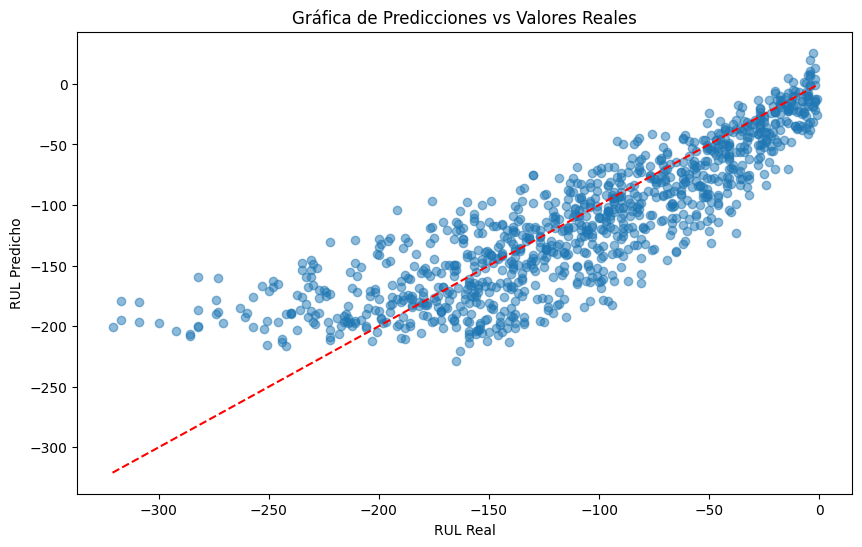

Mean Absolute Error (MAE): 27.815967174513773
Mean Squared Error (MSE): 1310.8967553255704
Root Mean Squared Error (RMSE): 36.206308225578184
Coeficiente de Determinación (R^2): 0.7152092456817627
Mean Absolute Percentage Error (MAPE): 37.65%
Precisión del modelo: 62.35%


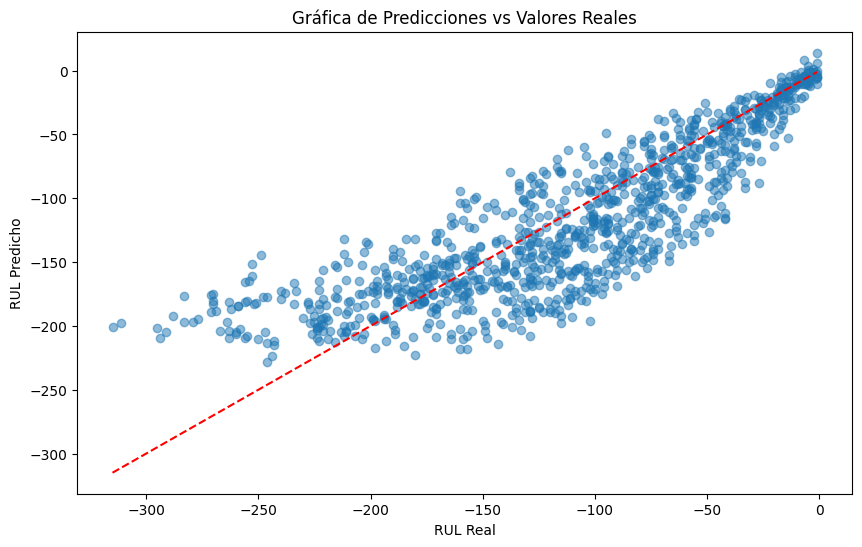

Mean Absolute Error (MAE): 26.363303103168764
Mean Squared Error (MSE): 1240.7602060138975
Root Mean Squared Error (RMSE): 35.22442626947808
Coeficiente de Determinación (R^2): 0.744242250919342
Mean Absolute Percentage Error (MAPE): 36.02%
Precisión del modelo: 63.98%


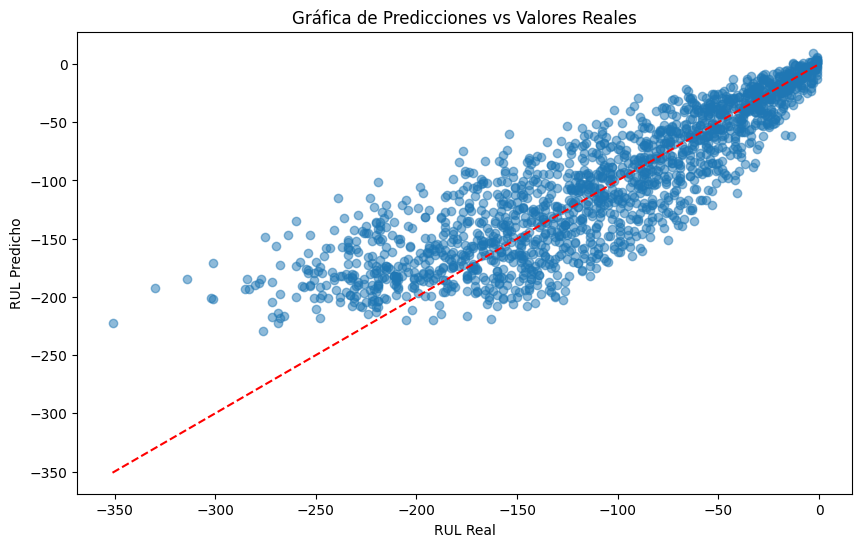

Mean Absolute Error (MAE): 26.538611780581608
Mean Squared Error (MSE): 1303.2224145981816
Root Mean Squared Error (RMSE): 36.100171946933735
Coeficiente de Determinación (R^2): 0.7258431315422058
Mean Absolute Percentage Error (MAPE): 33.87%
Precisión del modelo: 66.13%


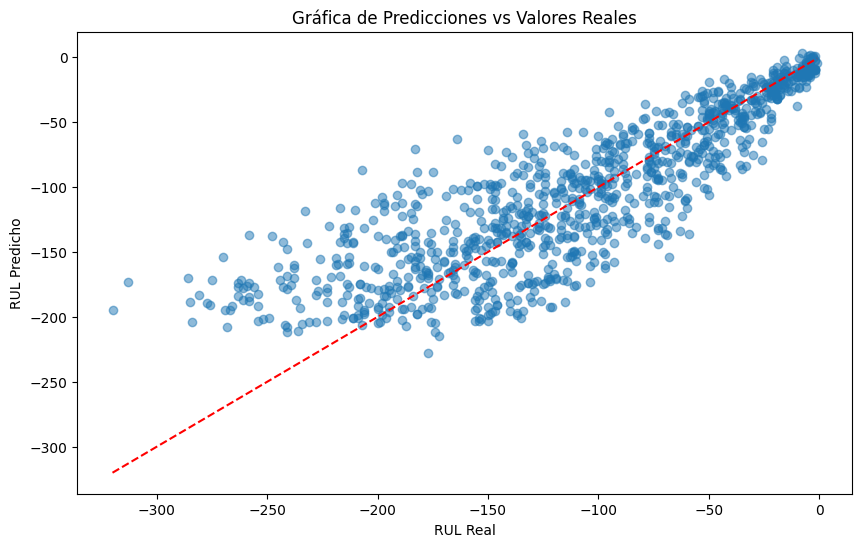

Mean Absolute Error (MAE): 25.598643784081254
Mean Squared Error (MSE): 1163.9155240255898
Root Mean Squared Error (RMSE): 34.11620617867101
Coeficiente de Determinación (R^2): 0.7627626061439514
Mean Absolute Percentage Error (MAPE): 34.78%
Precisión del modelo: 65.22%


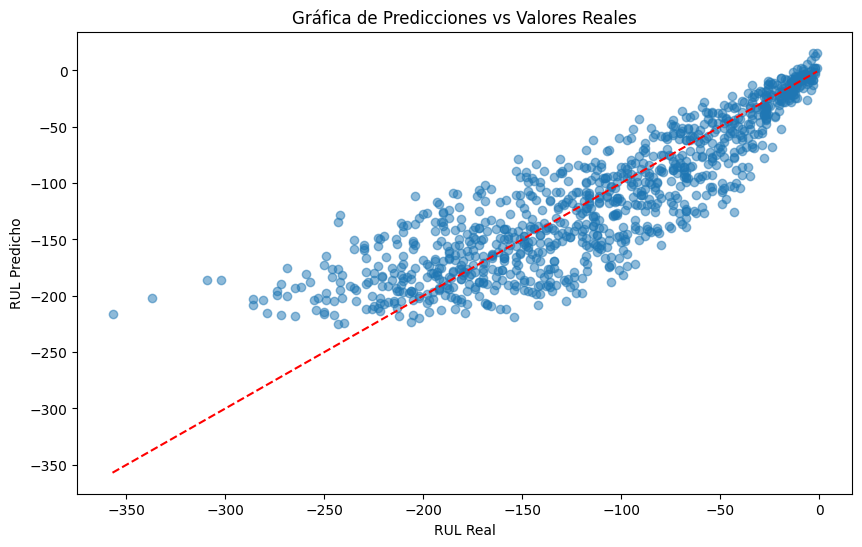

In [ ]:
# Pruebas para mostrar resultados

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(6):
  # Obtener los datos de entrenamiento
  y_predicted = np.array(predictions[f'cluster_{i}']).flatten()
  y_test = np.array(test_sets[f'test_cluster_{i}']['RUL'])
  # Calcular las métricas de error
  mae = mean_absolute_error(y_test, y_predicted)
  mse = mean_squared_error(y_test, y_predicted)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_predicted)

  # Calcular el MAPE
  mape = np.mean(np.abs((y_test - y_predicted) / y_test)) * 100
  mape = float(mape)
  # Calcular la precisión en porcentaje
  precision = 100 - mape

  # Imprimir los resultados
  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"Mean Squared Error (MSE): {mse}")
  print(f"Root Mean Squared Error (RMSE): {rmse}")
  print(f"Coeficiente de Determinación (R^2): {r2}")
  print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
  print(f"Precisión del modelo: {precision:.2f}%")

  # Asegúrate de que no haya valores nulos en 'RUL' o 'predictions'
  # y_test.fillna(0, inplace=True)
  # y_predicted.fillna(0, inplace=True)

  # Calcular los errores nuevamente
  errores = y_predicted - y_test

  # 1. Gráfica de Predicciones vs Valores Reales
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_predicted, alpha=0.5)
  plt.plot([y_test.min(), y_test.max()],
          [y_test.min(), y_test.max()], 'r--')  # Línea de identidad
  plt.xlabel("RUL Real")
  plt.ylabel("RUL Predicho")
  plt.title("Gráfica de Predicciones vs Valores Reales")
  plt.show()

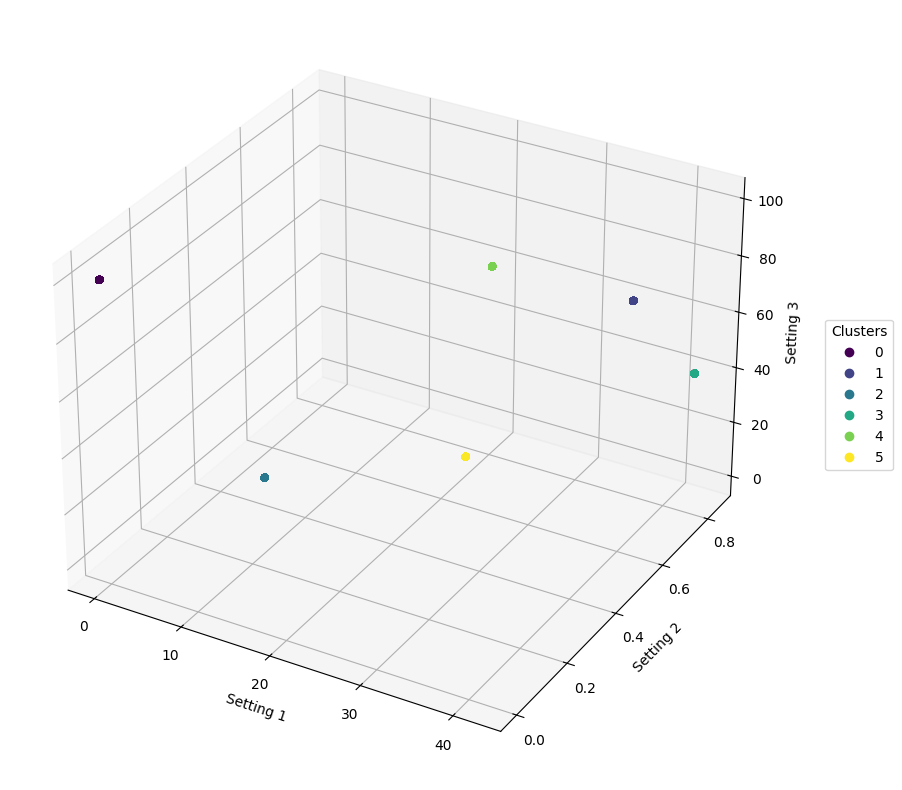

In [ ]:
# Aumentar el tamaño del gráfico
fig = plt.figure(figsize=(10, 8))  # Cambiar tamaño del gráfico

ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos, color por cluster
scatter = ax.scatter(df['setting_1'], df['setting_2'], df['setting_3'], c=df['cluster'], cmap='viridis')

# Añadir etiquetas de los ejes
ax.set_xlabel('Setting 1')
ax.set_ylabel('Setting 2')
ax.set_zlabel('Setting 3')

# Colocar la leyenda fuera del gráfico
legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc="center left", bbox_to_anchor=(1.05, 0.5))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Definir las columnas del dataset
columns = ['motor_id', 'cycle'] + [f'setting_{i}' for i in range(1, 4)] + [f'sensor_measurement_{i}' for i in range(1, 21)]

# Cargar el archivo 'train.txt' en un DataFrame de pandasss
df = pd.read_excel('/content/Datos para validación de modelo y competencia.xlsx', header=None, names=columns, index_col=False)

# Eliminar cualquier columna extra que pueda haber sido creada debido a espacios en blanco adicionales
df = df.dropna(axis=1, how='all')

# Group by 'motor_id' and get the index of the maximum 'cycle' for each group
test_dataset = df.loc[df.groupby('motor_id')['cycle'].idxmax()]

# Cargar el modelo KMeans guardado
kmeans = joblib.load("kmeans_model.pkl")

# Asignar el cluster al set de datos
cluster_test = kmeans.predict(test_dataset[['setting_1', 'setting_2', 'setting_3']])
# Se agrega la columna al dataframe de validación
test_dataset['cluster'] = cluster_test


columns_to_drop = [
    'setting_2', "cluster",
    'sensor_measurement_2', 'sensor_measurement_5', 'sensor_measurement_6',
    'sensor_measurement_7', 'sensor_measurement_19', 'sensor_measurement_20'
]

# Diccionario para almacenar los modelos
models = {}

# Lista para almacenar las predicciones
predictions = []

for i in range(6):
    models[f'cluster_{i}'] = {
        'model_1': load_model(f'model_1_cluster_{i}.keras'),
        'model_2': load_model(f'model_2_cluster_{i}.keras'),
        'model_3': load_model(f'model_3_cluster_{i}.keras')
    }

# Normalizar los datos para la prueba
scaler = MinMaxScaler()
cluster = test_dataset['cluster']
scaled_data = scaler.fit_transform(test_dataset)
input_data = pd.DataFrame(scaled_data, columns=test_dataset.columns)
input_data = input_data.drop(columns=columns_to_drop)

# Iterar sobre cada fila del DataFrame de verificación
for index, row in input_data.iterrows():

    # Obtener los modelos correspondientes
    model1 = models[f'cluster_{int(cluster.iloc[index])}']['model_1']
    model2 = models[f'cluster_{int(cluster.iloc[index])}']['model_2']
    model3 = models[f'cluster_{int(cluster.iloc[index])}']['model_3']

    # Preparar la fila actual para la predicción
    row = row.values.reshape(1, -1)

    # Realizar la predicción
    prediction1 = model1.predict(row)
    prediction2 = model2.predict(row)
    prediction3 = model3.predict(row)

    # Calcular el promedio de las predicciones
    average_prediction = (prediction1 + prediction2 + prediction3) / 3

    # Almacenar la predicción
    predictions.append(average_prediction[0])  # Suponiendo que es un valor unidimensional

for prediction in predictions:
  print(prediction)

<ipython-input-25-adeac11be463>:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_excel('/content/Datos para validación de modelo y competencia.xlsx', header=None, names=columns, index_col=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━